In [1]:
import cv2#cv2라이브러리를 이용해서 이미지 읽어옴
import numpy as np
import os
from matplotlib import pyplot as plt
print(os.getcwd())
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\hi\Anaconda3\jupiter\day21딥러닝


In [2]:
from matplotlib import rc
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
 
%config InlineBackend.figure_format = 'retina'

In [3]:
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'#윈도우안에있는 폰트파일주소.
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [4]:
data_dir = os.chdir(os.getcwd() + "./DL_cloth_Img/all_clothes/")

In [5]:
print(os.getcwd())

C:\Users\hi\Anaconda3\jupiter\day21딥러닝\DL_cloth_Img\all_clothes


In [6]:
import glob
from glob import glob

In [7]:
data_list = glob('*.jpg')
print('파일의 목록 개수 >> ', len(data_list))
print('파일의 목록 타입 >> ', type(data_list))

파일의 목록 개수 >>  7652
파일의 목록 타입 >>  <class 'list'>


In [8]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# string을 특정한 기준에 의해 token으로 끊어 리스트를 리턴
# ex) blouse.0.jpg => blouse만 추출해서 list에 담아보자

In [9]:

token = text_to_word_sequence(data_list[0])
token, type(token)

(['blouse', '0', '1', 'jpg'], list)

In [10]:
label2 = []

In [11]:
for x in data_list[:7653]:
    token = text_to_word_sequence(x)
    label2.append(token[0])
len(label2)

7652

In [12]:
# 라벨 인코딩(카테고리형 문자를 숫자로 자동 변환해주는 역할)
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()
encoder = LabelEncoder()
label3 = encoder.fit_transform(label2)
label3[:5]

array([0, 0, 0, 0, 0], dtype=int64)

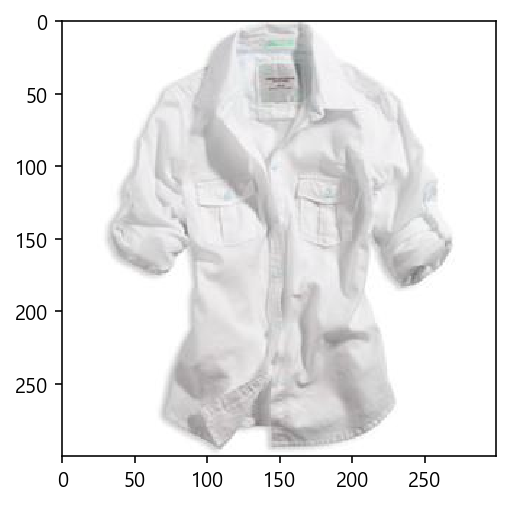

In [14]:
img0 = cv2.imread(data_list[0])
plt.imshow(img0)

In [15]:
#이미지 shape확인!(가로,세로,칼라)의미
img0.shape

(300, 300, 3)

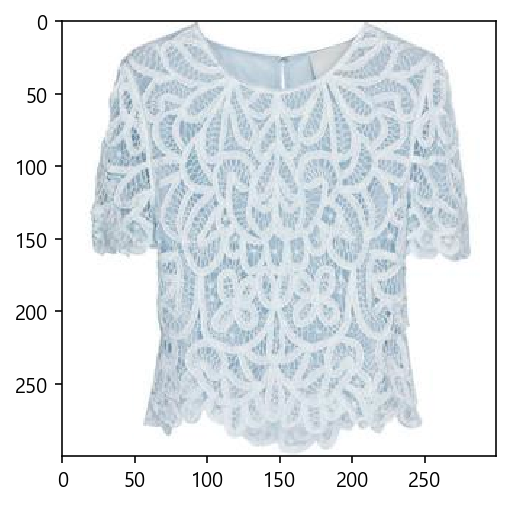

In [16]:
img1 = cv2.imread(data_list[1])
plt.imshow(img1)

In [17]:
data_height = 100
data_width = 100
channel_n = 3#칼라로 맞추기(흑백이면 1)칼라는 rgb3개를 고려해야하기 때문에 3이다.

In [18]:
## 이미지 표준화(0~1사이로)
## 픽셀은 0~255의 크기를 가지므로 255로 나누어서 
## 표준화를 진행해주자.(0~1사이로표시)
## 7652개의 크기를 다 변경해주세요
img_list = []#크기를 변경하고 나서의 결과를 모아주기 위한 리스트
# 7652개의 이미지 전처리(스케일링)
for x in data_list:
    #픽셀크기가(0~255)이므로 255로 나누자
    scaled_one = cv2.imread(x) / 255
    resized_one = cv2.resize(scaled_one, (data_height, data_width))
#     print('변경 전', scaled_one.shape)
#     print('변경 후', resized_one.shape)    
    img_list.append(resized_one)
len(img_list),img_list[0].shape

(7652, (100, 100, 3))

In [19]:
img_list[0][0]

array([[1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.

In [20]:
##data_list : 전체 이미지 목록의 리스트
##읽어온 이미지 목록을 넣으면 라벨링/이미지 스케일링/리사이징해서
##우리가 원하는 이미지 데이터를 만들자.
def make_file(data_height, data_width, channel_n, data_list_n):#len(data_list)=data_list_n
    ## 라벨링한 결과 넣어줄 리스트 필요
    label = []
    ## 4차원으로 만들어줄 4차원 리스트 필요
    images = np.zeros((data_list_n, data_height, data_width, channel_n))
    ## 이미지 리스트에서 하나씩 꺼내서 라벨링, 스케일링, 리사이징하자
    for i, image in enumerate(data_list):#i가 1씩증가,data_list에 이미지 목록 다 들어있음
        
        ## 라벨링:
        tokens = text_to_word_sequence(image)#이미지를 토큰으로 끊어주자(이런식으로)
        label.append(tokens[0])#0번째 토큰
        
        ## 읽어서, 스케일링, 리사이징해서
        image2 = cv2.imread(image)
        image3 = cv2.resize(image2,(data_height, data_width)) / 255
        
        ## 4차원 리스트에 하나씩 끼자
        images[i, :, :, :] = image3
    label2 = np.array(label)
    return label2, images

In [21]:
labels, images = make_file(data_height, data_width, channel_n, 7652)#7652개의 이미지

In [22]:
#labels에 어떤 옷인지에 대한 카테고리 토큰만 담김
labels

array(['blouse', 'blouse', 'blouse', ..., 'tshirt', 'tshirt', 'tshirt'],
      dtype='<U7')

In [23]:
#7652개 1차원의 shape을 가짐['blouse', 'blouse', 'jacket', ..., 'tshirt']
labels.shape

(7652,)

In [24]:
items = label2
#카테고리를 라벨인코더를 통해 수치화 시켜보자.
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label, len(label) 

(array([0, 0, 0, ..., 7, 7, 7], dtype=int64), 7652)

# LabelEncoder를 통한 카테고리 수치화
## blouse=0
## dress=1
## jacket=2
## pant=3
## short=4
## skirt=5
## sweater=6
## tshirt=7

In [25]:
encoder.classes_

array(['blouse', 'dress', 'jacket', 'pant', 'short', 'skirt', 'sweater',
       'tshirt'], dtype='<U7')

# train, test데이터를 나누기

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
x = images
y = label

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size= 0.2,
                                                    random_state=55
                                                   )
print(X_train.shape, X_test.shape)

(6121, 100, 100, 3) (1531, 100, 100, 3)


In [29]:
## 딥러닝 모델을 만들어보자.
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import datasets, layers, models

# 레이어 쌓기

In [30]:
model = models.Sequential()

In [31]:

## 특성추출 레이어를 쌓아준다.
model.add(Conv2D(32,(3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model.add(MaxPool2D((2,2)))#최대값으로 요약
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPool2D((2,2)))#최대값으로 요약

## 딥러닝 학습 레이어를 쌓아준다.
## 입력 -- 히든 -- 출력 순서대로 쌓아준다.
## 입력(1개)--1차원이어야함
model.add(Flatten())#이미지 데이터를 1차원으로 만들어주는 객체
## 히든(N개)
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌
model.add(Dense(16, activation='relu'))
model.add(Dropout(rate=0.5))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌

## 출력(1개)--딥러닝으로 하는 학습의 종류에 따라 다르게 써주어야 함!
## 이진 분류인경우(1, sigmoid)
## 다중 분류인경우(1, softmax)
## 회귀인 경우(1, linear)
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 64)                2

In [32]:
## 모델의 설정값 지정
## 1. 기울기 찾는데 최적의 방법 설정(optimizer)
## 2. 특정한 가중치를 가지는 경우 오차를 계산하는 방법 설정(loss)
##    회귀인 경우: mae
##    분류인 경우: 이진=> binary_crossentropy,
##    다중분류인 경우=> sparse_categorical_crossentropy
## 3. fit시킬 때 fit시키는 상황이 순서대로 프린트되는데 출력되는 항목 설정(metrics)
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# epochs돌리기

In [33]:
## 공부시키자
# epoch마다 train의 loss,acc 뿐만아니라 test의 loss,acc도 알고싶어
# fit함수안에 validation_data=(X_test, y_test)를 넣어 돌려보자.
# 조기종료(earlyStopping) : 
# epoch를 실행할 때 최적의 acc인 경우, 더이상 epoch를 수행하지 않아도 되도록 설정
# 모델저장(checkPoint):
# 최적의 acc인 경우의 가중치를 자동으로 모델파일로 저장하게 설정
# 특정한 상황을 기다렸다가 특정한 처리를 하고자 하는 경우(콜백함수)
# 1)객체를 만들어주고, fit(callbacks = [객체])
es = EarlyStopping(patience=5, restore_best_weights=True)
cp = ModelCheckpoint('best_cnn_1.h5')
cnn_history = model.fit(
    X_train,
    y_train,
    batch_size=50,
    epochs=30,#30
    validation_data=(X_test, y_test),
    callbacks=[es, cp],
    verbose=2
)

Epoch 1/30
123/123 - 26s - loss: 2.0840 - accuracy: 0.1449 - val_loss: 2.0499 - val_accuracy: 0.2351 - 26s/epoch - 213ms/step
Epoch 2/30
123/123 - 26s - loss: 2.0136 - accuracy: 0.2117 - val_loss: 1.8998 - val_accuracy: 0.3984 - 26s/epoch - 208ms/step
Epoch 3/30
123/123 - 26s - loss: 1.9320 - accuracy: 0.2962 - val_loss: 1.8326 - val_accuracy: 0.4095 - 26s/epoch - 212ms/step
Epoch 4/30
123/123 - 27s - loss: 1.8487 - accuracy: 0.3372 - val_loss: 1.7388 - val_accuracy: 0.4775 - 27s/epoch - 218ms/step
Epoch 5/30
123/123 - 28s - loss: 1.8109 - accuracy: 0.3504 - val_loss: 1.6149 - val_accuracy: 0.5049 - 28s/epoch - 224ms/step
Epoch 6/30
123/123 - 28s - loss: 1.7329 - accuracy: 0.3829 - val_loss: 1.5640 - val_accuracy: 0.5003 - 28s/epoch - 227ms/step
Epoch 7/30
123/123 - 27s - loss: 1.6860 - accuracy: 0.4039 - val_loss: 1.4800 - val_accuracy: 0.5395 - 27s/epoch - 220ms/step
Epoch 8/30
123/123 - 27s - loss: 1.6232 - accuracy: 0.4186 - val_loss: 1.4120 - val_accuracy: 0.5447 - 27s/epoch - 221

In [34]:
test_result = model.evaluate(X_test,y_test) 
test_result

48/48 [==============================] - 2s 38ms/step - loss: 1.1495 - accuracy: 0.6146


[1.1494734287261963, 0.614630937576294]

# test, train데이터의 정확도를 그래프로 비교해보자

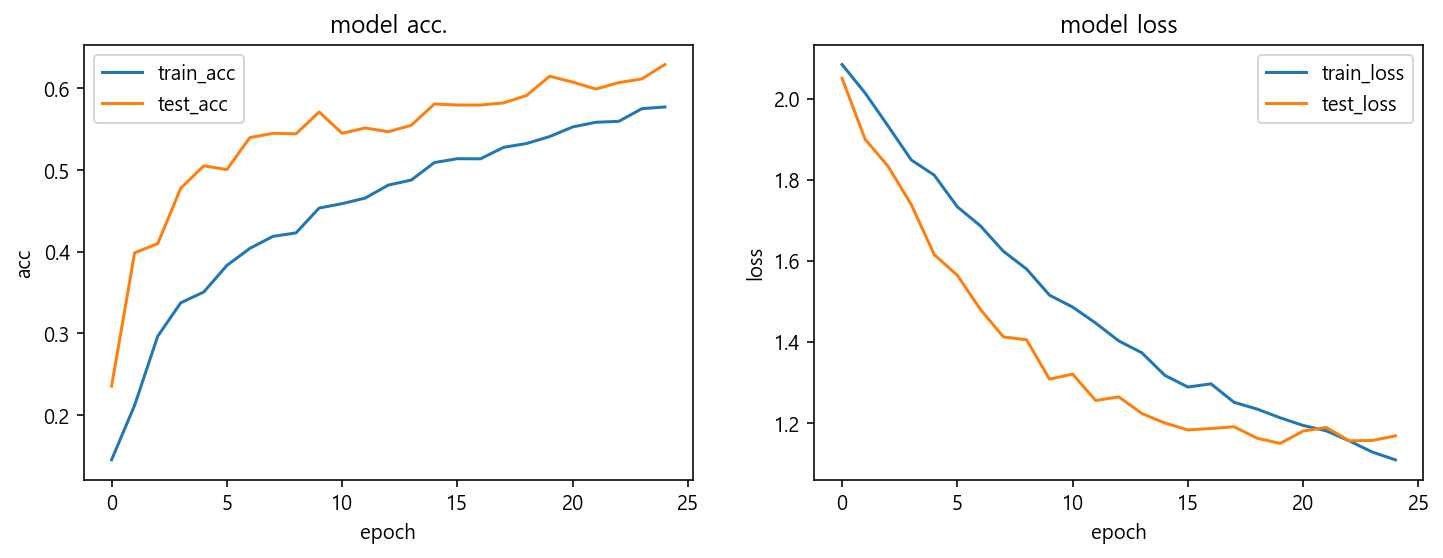

In [35]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) ## 1행2열의 도표, 1열
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model acc.')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc','test_acc'])

plt.subplot(1, 2, 2) ## 1행2열의 도표, 2열
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','test_loss'])

# 실제 값과 예측값이 같은지 시각화하여 비교해보자

In [36]:
class_names = ['blouse', 'dress', 'jacket', 'pants', 'shorts',
               'skirt', 'sweater', 'Tshirt']

In [37]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("'예측: {}'      실제: {}'".format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)

In [28]:
# probability_model = tf.keras.Sequential([model, 
#                                          tf.keras.layers.Softmax()])
# predictions = probability_model.predict(X_test)

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.show()

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.show()

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))


In [39]:
import os
import sys
import urllib
from functools import partial
from tkinter import *
import tkinter.filedialog as tkfd
import requests
from PIL import Image, ImageTk
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from glob import glob
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
# from tkinter import *
# import tkinter
# import os

# 분류된 카테고리의 상품 개수가 몇개인지 세어보자.

In [40]:
find_user_tag = load_model('./best_cnn_1.h5')
find_user_tag

In [41]:
final_result2 = find_user_tag.predict(X_test)
final_result2[:10]

array([[9.08897892e-02, 2.05055490e-01, 8.72314051e-02, 6.55698627e-02,
        8.74262527e-02, 3.53920430e-01, 5.41541241e-02, 5.57526089e-02],
       [7.21902549e-02, 2.87462082e-02, 3.63014801e-03, 8.57620194e-07,
        1.22768441e-04, 8.31078272e-03, 1.28630465e-02, 8.74135971e-01],
       [1.13073764e-02, 7.35936284e-01, 3.11219296e-03, 2.25306663e-04,
        2.05255044e-03, 1.91740170e-01, 2.13365513e-03, 5.34924641e-02],
       [1.91843733e-01, 5.42242527e-02, 2.95218974e-02, 6.60517908e-05,
        7.79732305e-04, 2.29741652e-02, 7.65480697e-02, 6.24042034e-01],
       [2.00530112e-01, 1.10119961e-01, 1.61860541e-01, 2.57369559e-02,
        5.60909770e-02, 1.80245221e-01, 1.75495371e-01, 8.99208561e-02],
       [1.67241320e-01, 6.48490340e-02, 2.09406074e-02, 1.86118836e-04,
        1.27694919e-03, 2.56840214e-02, 5.96350394e-02, 6.60186946e-01],
       [9.14601795e-03, 7.40555525e-01, 3.11600300e-03, 1.30240034e-04,
        2.02332484e-03, 2.09586769e-01, 1.63566030e-03, 3.

In [42]:
y_test[:15]

array([5, 6, 1, 0, 6, 7, 1, 2, 7, 7, 2, 6, 5, 5, 2], dtype=int64)

In [43]:
y_list = y_test.tolist()
y_list[:15]

[5, 6, 1, 0, 6, 7, 1, 2, 7, 7, 2, 6, 5, 5, 2]

In [44]:
y_list_0 = y_list.count(0)
print(y_list_0)
y_list_1 = y_list.count(1)
print(y_list_1)
y_list_2 = y_list.count(2)
print(y_list_2)
y_list_3 = y_list.count(3)
print(y_list_3)
y_list_4 = y_list.count(4)
print(y_list_4)
y_list_5 = y_list.count(5)
print(y_list_5)
y_list_6 = y_list.count(6)
print(y_list_6)
y_list_7 = y_list.count(7)
print(y_list_7)

214
185
195
177
190
201
178
191


# tkinter
## tkinter로 이미지를 선택 후 해당 이미지의 카테고리가 무엇인지 출력해보자.

In [1]:
from tkinter import *
from tkinter.ttk import *
import tkinter.font as font
from tkinter import filedialog
import os
from PIL import ImageTk, Image
import tensorflow as tf
import cv2
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 실무에 사용할 데이터 준비하기

# 2. 모델 불러오기
from keras.models import load_model

In [2]:
def call():
    class_names = ['blouse', 'dress', 'jacket', 'pants', 'shorts',
                   'skirt', 'sweater', 'Tshirt']
    # 이미지마다 크기가 다 다르다.-> 픽셀 사이즈 동일해게 해주어야 전처리가 가능하다.
    data_height = 100
    data_width = 100
    channel_n = 3
    images = np.zeros((1, data_height, data_width, channel_n))
    ## 이미지 읽고, 스케일링, 리사이징
    print(path,'--------------')
    image = cv2.imread(path)
    print(image)
    image = cv2.resize(image, (data_height, data_width)) / 255
    images[0, :, :, :] = image
    
    model = load_model('C:/Users/hi/Anaconda3/jupiter/day21_deep/DL_cloth_Img/all_clothes/best_cnn_1.h5')

    # 3. 모델 사용하기
    yhat = model.predict(images)
    np.argmax(yhat)
    class_names[np.argmax(yhat)]
   
    print('Predict : ' +  class_names[np.argmax(yhat)])
    my_img = Label(window ,
          text="예측카테고리는: " + class_names[np.argmax(yhat)],
          font=('comic sans', 10)
          )
    my_img.pack()
    
    t0 = Label(window, text="")
    t1 = Label(window, text="")
    t2 = Label(window, text="")
    t3 = Label(window, text="")
    t4 = Label(window, text="")
    t5 = Label(window, text="")
    t6 = Label(window, text="")
    t7 = Label(window, text="")

    t0["text"] = "blouse :  214 개의 이미지가 있습니다"   
    t1["text"] = "dress :  185개의 이미지가 있습니다"
    t2["text"] = "jacket : 195개의 이미지가 있습니다"
    t3["text"] = "pant : 177개의 이미지가 있습니다"
    t4["text"] = "short : 190개의 이미지가 있습니다."
    t5["text"] = "skirt : 201개의 이미지가 있습니다"
    t6["text"] = "sweater : 178개의 이미지가 있습니다"
    t7["text"] = "t-shirt : 191개의 이미지가 있습니다."
    t0.pack()
    t1.pack()
    t2.pack()
    t3.pack()
    t4.pack()
    t5.pack()
    t6.pack()
    t7.pack()
#     y_list_0 = y_list.count(0)
   


In [3]:

# def call():
#     class_names = ['blouse', 'dress', 'jacket', 'pants', 'shorts',
#                    'skirt', 'sweater', 'Tshirt']
#     # 이미지마다 크기가 다 다르다.-> 픽셀 사이즈 동일해게 해주어야 전처리가 가능하다.
#     data_height = 150
#     data_width = 150
#     channel_n = 3
#     images = np.zeros((1, data_height, data_width, channel_n))
#     ## 이미지 읽고, 스케일링, 리사이징
#     image = cv2.imread(path)
#     image = cv2.resize(image, (data_height, data_width)) / 255
#     images[0, :, :, :] = image
    
#     model = load_model('C:/Users/hi/Anaconda3/jupiter/day21딥러닝/DL_cloth_Img/all_clothes/best_cnn_1.h5')

#     # 3. 모델 사용하기
#     yhat = model.predict(images)
#     yhat =np.argmax(images)
   
#     print('Predict : ' + class_names[yhat])
#     my_img = Label(window ,
#           text=class_names[yhat],
#           font=('comic sans', 10)
#           )
#     my_img.pack()
        
#     ##text객체생성
#     t0 = Label(window, text="")
#     t1 = Label(window, text="")
#     t2 = Label(window, text="")
#     t3 = Label(window, text="")
#     t4 = Label(window, text="")
#     t5 = Label(window, text="")
#     t6 = Label(window, text="")
#     t7 = Label(window, text="")

#     t0.pack()
#     t1.pack()
#     t2.pack()
#     t3.pack()
#     t4.pack()
#     t5.pack()
#     t6.pack()
#     t7.pack()

#     y_list_0 = y_list.count(0)
#     y_list_1 = y_list.count(1)
#     y_list_2 = y_list.count(2)
#     y_list_3 = y_list.count(3)
#     y_list_4 = y_list.count(4)
#     y_list_5 = y_list.count(5)
#     y_list_6 = y_list.count(6)
#     y_list_7 = y_list.count(7)
#     # ##분류된 카테고리와 그 개수 text로 출력

    
#     t1["text"] = "dress : " + str(y_list_0) + "개의 이미지가 있습니다"
#     t2["text"] = "jacket : " + str(y_list_0) + "개의 이미지가 있습니다"
#     t3["text"] = "pant :" + str(y_list_0) + "개의 이미지가 있습니다"
#     t4["text"] = "short : " + str(y_list_0) + "개의 이미지가 있습니다."
#     t5["text"] = "skirt : " + str(y_list_0) + "개의 이미지가 있습니다"
#     t6["text"] = "sweater : " + str(y_list_0) + "개의 이미지가 있습니다"
#     t7["text"] = "t-shirt : " + str(y_list_0) + "개의 이미지가 있습니다."
#     test_all = Label(window, text= t1["text"], font=('comic sans', 10))
#     test_all.pack()

    
    
    
   

In [4]:
#기본 설정
window = Tk()

window.title('GUI')
window.geometry("500x530")

#사진입력
label = Label(window, text = '사진입력').pack()

#분류버튼
button = Button(window, 
                text="image classification", 
                width=40,
                command=call
               )
button.pack()

#파일 첨부하기
path = filedialog.askopenfilename(filetypes=[('Image File','jpg'), ('Image File','jpg'), ('Image File','jpg')])
path=path.replace('\\','/')

if path == '':exit()
image=ImageTk.PhotoImage(Image.open(path))  
label=Label(window, image=image) #라벨 생성, 라벨에는 앞서 선언한 이미지가 들어감.
label.pack()
window.mainloop()

AttributeError: 'str' object has no attribute 'read'